In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Data - A1.csv')
#df.head()

In [2]:
mean = df['X'].mean()
std = df['X'].std()
df['X'] = (df['X'] - mean) / std
#df.head()

In [3]:
df = df.sample(frac=1, random_state=42)

# Split into training (80%) and testing (20%) sets without scikit-learn
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

# Reset index for the split DataFrames
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)


In [4]:
def polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(degree+1)])
def batch_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        error = np.dot(X, theta) - y
        gradient = np.dot(X.T, error) / m
        theta -= learning_rate * gradient
    return theta

In [5]:
degrees = list(range(1, 10))
best_degree = None
best_model = None
best_mse = float('inf')

for degree in degrees:
    X_train_poly = polynomial_features(train_df['X'], degree)
    X_test_poly = polynomial_features(test_df['X'], degree)

    # Initialize theta with zeros
    theta = np.zeros(degree+1)

    # Hyperparameters
    learning_rate = 0.01
    num_iterations = 500

    # Train the model
    theta = batch_gradient_descent(X_train_poly, train_df['Y'], theta, learning_rate, num_iterations)

    # Calculate predictions on the test set
    predictions = np.dot(X_test_poly, theta)

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((predictions - test_df['Y'])**2)

    # Update best model if this degree has a lower MSE
    if mse < best_mse:
        best_mse = mse
        best_degree = degree
        best_model = theta
print(best_degree)

4


<ipython-input-4-0d053ca74d9b>:8: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


<ipython-input-4-0d053ca74d9b>:8: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


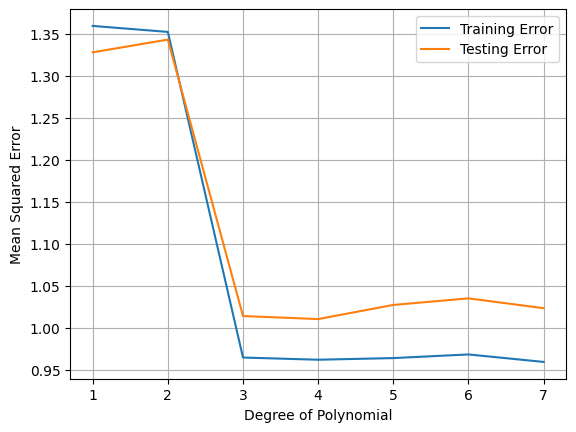

In [6]:
import matplotlib.pyplot as plt
train_errors = []
test_errors = []

for degree in degrees:
    X_train_poly = polynomial_features(train_df['X'], degree)
    X_test_poly = polynomial_features(test_df['X'], degree)

    # Initialize theta with zeros
    theta = np.zeros(degree+1)

    # Train the model
    theta = batch_gradient_descent(X_train_poly, train_df['Y'], theta, learning_rate, num_iterations)

    # Calculate training error
    train_predictions = np.dot(X_train_poly, theta)
    train_mse = np.mean((train_predictions - train_df['Y'])**2)
    train_errors.append(train_mse)


    # Calculate testing error
    test_predictions = np.dot(X_test_poly, theta)
    test_mse = np.mean((test_predictions - test_df['Y'])**2)
    test_errors.append(test_mse)

plt.plot(degrees, train_errors, label='Training Error')
plt.plot(degrees, test_errors, label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-4-0d053ca74d9b>:8: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


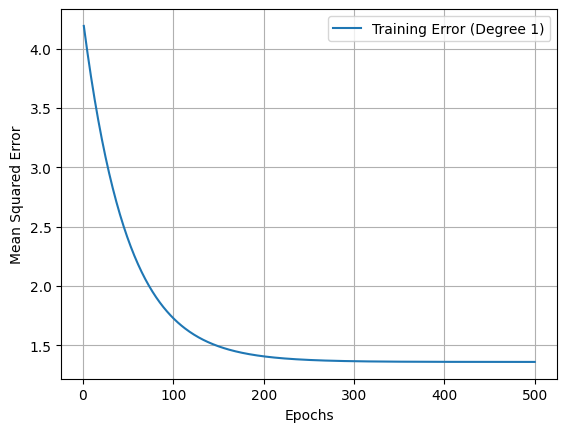

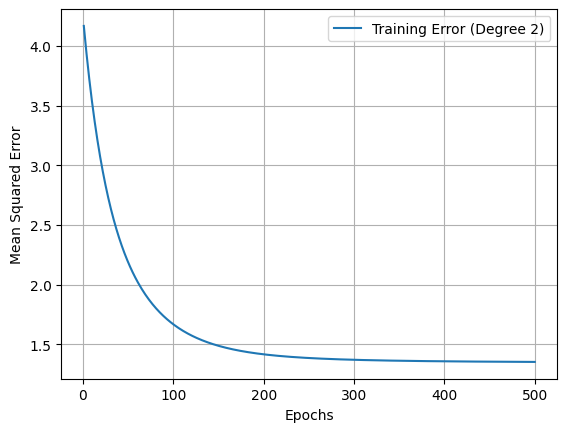

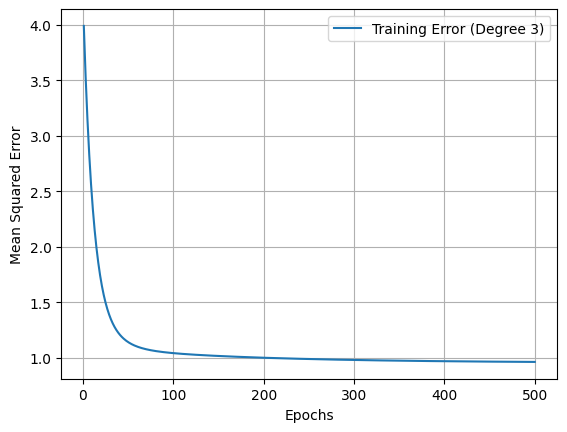

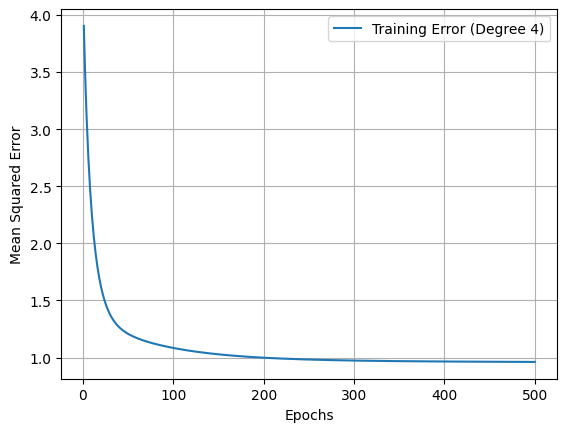

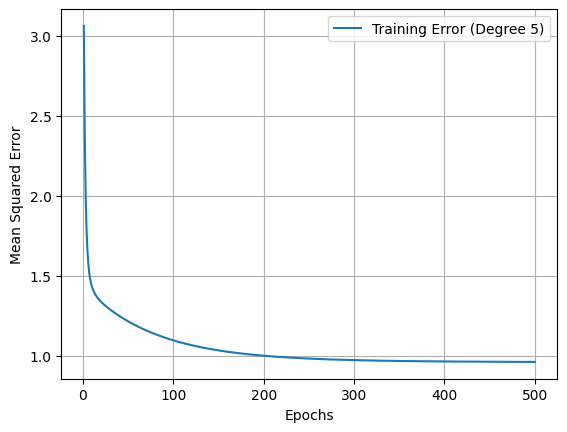

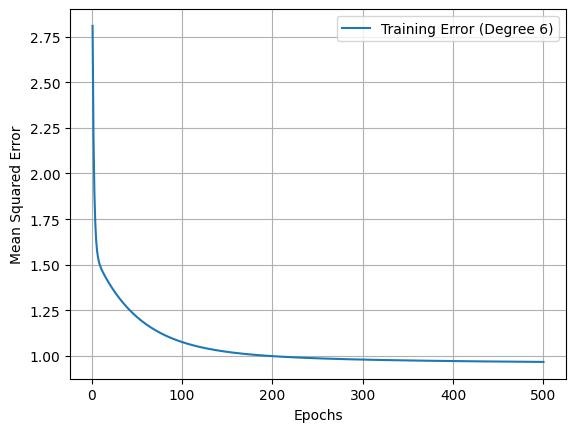

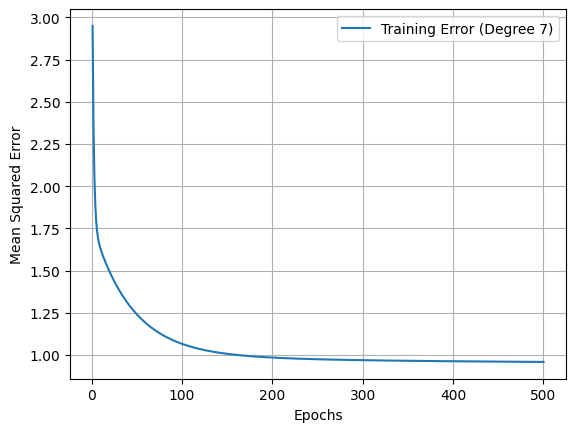

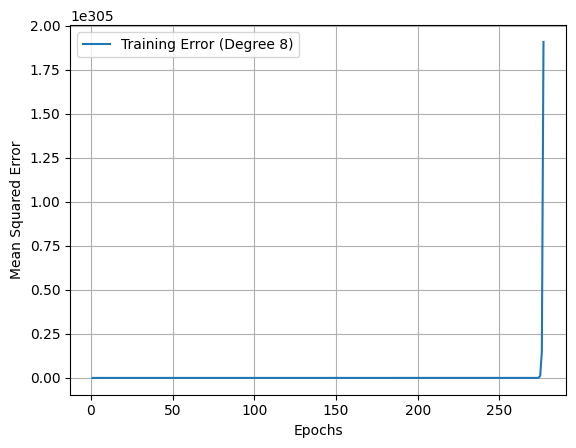

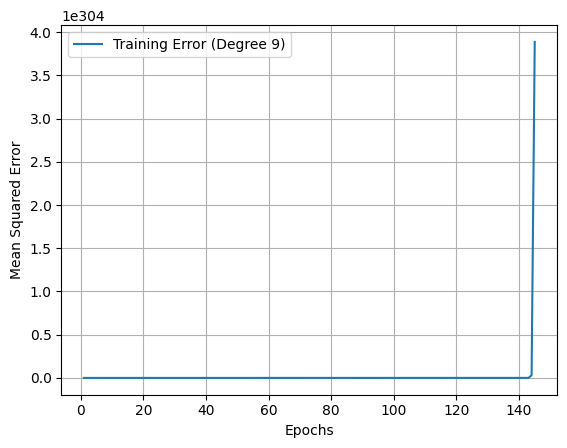

In [7]:
num_epochs = 500
epoch_range = range(1, num_epochs + 1)

# Initialize lists to store errors
train_errors_by_epoch = {degree: [] for degree in degrees}
test_errors_by_epoch = {degree: [] for degree in degrees}

# Perform gradient descent for each degree
for degree in degrees:
    X_train_poly = polynomial_features(train_df['X'], degree)
    X_test_poly = polynomial_features(test_df['X'], degree)

    # Initialize theta with zeros
    theta = np.zeros(degree+1)

    for epoch in epoch_range:
        # Perform one epoch of gradient descent
        theta = batch_gradient_descent(X_train_poly, train_df['Y'], theta, learning_rate, 1)

        # Calculate training error
        train_predictions = np.dot(X_train_poly, theta)
        train_mse = np.mean((train_predictions - train_df['Y'])**2)
        train_errors_by_epoch[degree].append(train_mse)

        # Calculate testing error
        test_predictions = np.dot(X_test_poly, theta)
        test_mse = np.mean((test_predictions - test_df['Y'])**2)
        test_errors_by_epoch[degree].append(test_mse)

# Plot training and testing errors vs. epochs for all degrees
for degree in degrees:
    plt.plot(epoch_range, train_errors_by_epoch[degree], label=f'Training Error (Degree {degree})')
    #plt.plot(epoch_range, test_errors_by_epoch[degree], label=f'Testing Error (Degree {degree})')

    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

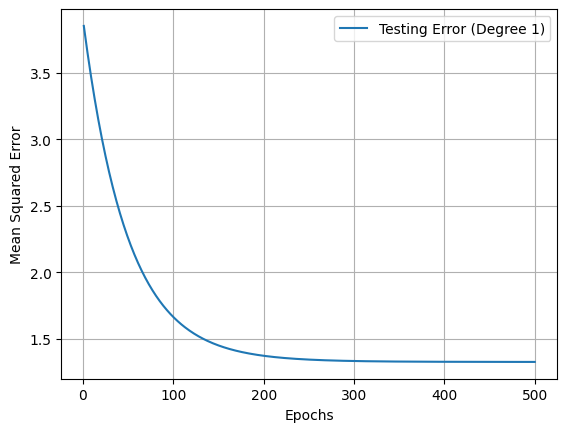

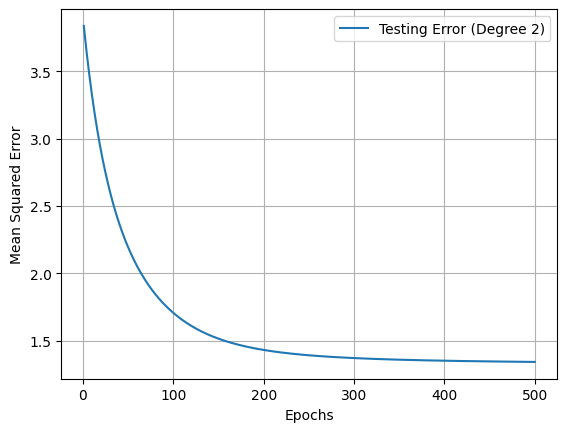

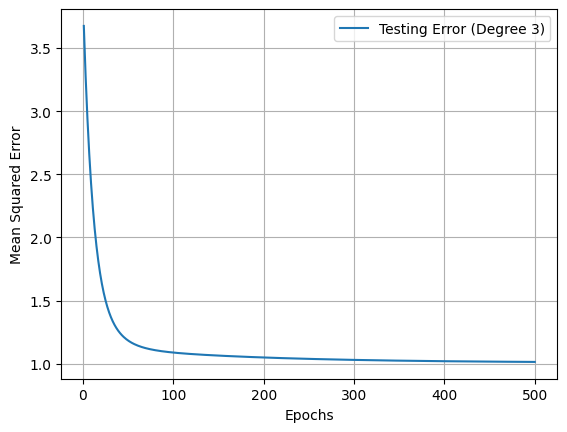

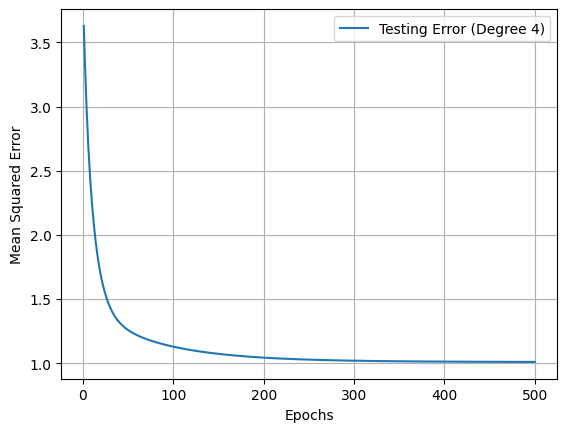

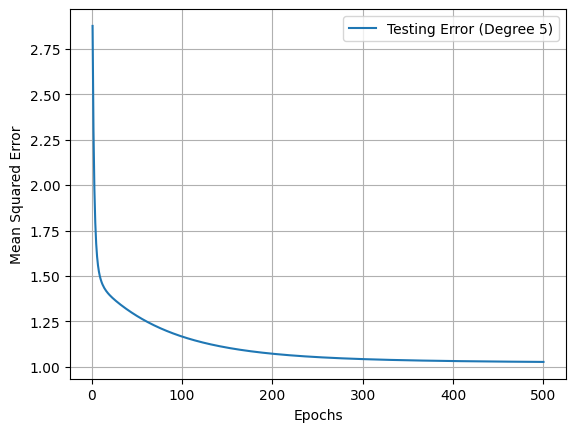

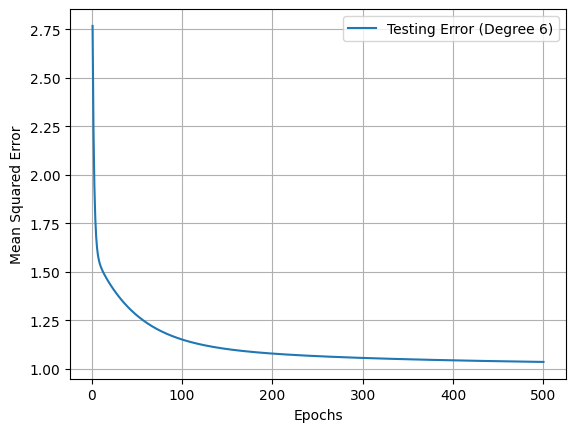

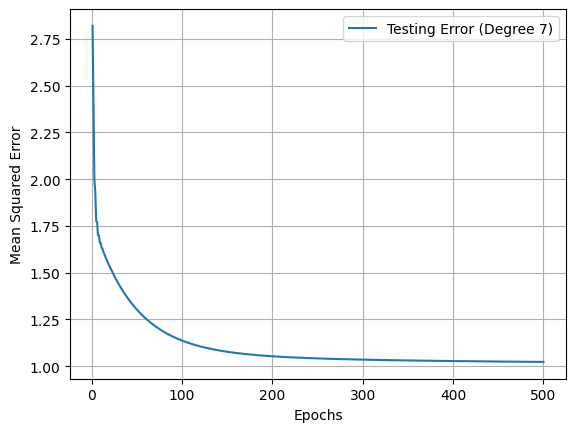

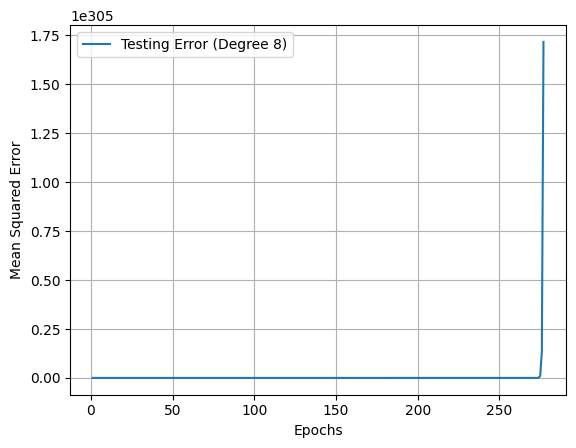

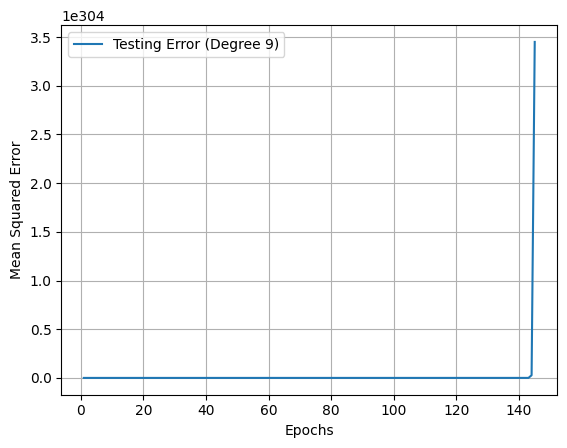

In [8]:
for degree in degrees:
    #plt.plot(epoch_range, train_errors_by_epoch[degree], label=f'Training Error (Degree {degree})')
    plt.plot(epoch_range, test_errors_by_epoch[degree], label=f'Testing Error (Degree {degree})')

    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()

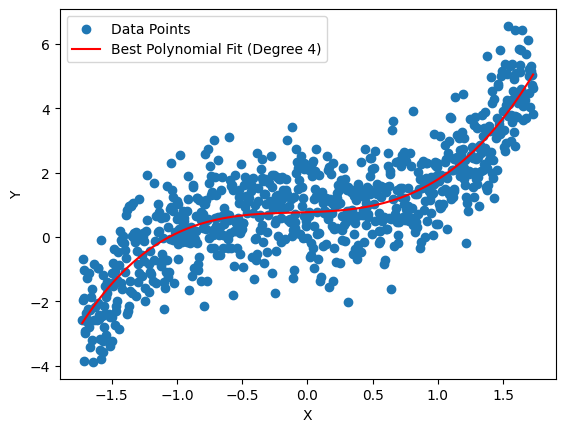

In [9]:
subset_df = train_df.sample(n=800, random_state=42)

# Plot the best polynomial fitted curve
plt.scatter(subset_df['X'], subset_df['Y'], label='Data Points')
x_range = np.linspace(min(subset_df['X']), max(subset_df['X']), 100)
x_poly = polynomial_features(x_range, best_degree)
y_poly = np.dot(x_poly, best_model)
plt.plot(x_range, y_poly, color='red', label=f'Best Polynomial Fit (Degree {best_degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()